# **PARTICIPATION ACTIVITY: Week 10 Create a Github Page for your code.**

Complete the following tasks:

1. Read [Creating a new repository](https://docs.github.com/en/repositories/creating-and-managing-repositories/creating-a-new-repository).

2. Create a personal GitHub account (it is free).

3.  Create an MSSP607 repository.

4.  Complete the Analyzing a Student Social Network assignment [here](https://canvas.upenn.edu/courses/1783827/files/140383295?wrap=1) and save it to the GitHub repository.

5.  Share the repository with the instructor and TAs'.

6. Submit the Google Colabs Network Assignment Notebook in Canvas; ensure the notebook includes a link to the GitHub repository.

In [80]:
#STEP 1

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

student_df = pd.read_csv('Student.csv')
connection_df = pd.read_csv('Connection.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of nodes: 53
Number of edges: 84


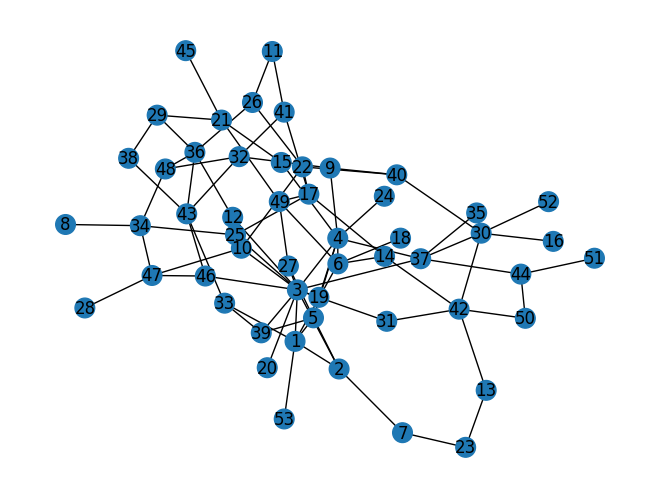

In [88]:
#STEP 2

graph = nx.Graph()

for _, row in student_df.iterrows():
    graph.add_node(row['Student_ID'], Age=row['Age'], Gender=row['Gender'], Major=row['Major'])
for _, row in connection_df.iterrows():
    graph.add_edge(row['Student_ID1'], row['Student_ID2'])
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

edge_widths = [1] * graph.number_of_edges()
node_sizes = [200] * graph.number_of_nodes()
node_size_map = {node: 1000 for node in graph.nodes()}
nx.draw(graph, with_labels=True, node_size=node_sizes, width=edge_widths)
plt.show()

In [89]:
#STEP 3

degree_centrality = nx.degree_centrality(graph)
print("Degree Centrality:", {k: round(v, 1) for k, v in degree_centrality.items()})

max_degree_centrality = max(degree_centrality.values())
most_connected_students = [
    student for student, centrality in degree_centrality.items() if centrality == max_degree_centrality]
print("Most connected student(s):", most_connected_students)

clustering_coefficient = nx.clustering(graph)
print("Clustering Coefficient:", {k: round(v, 1) for k, v in clustering_coefficient.items()})

cliques = list(nx.find_cliques(graph))
print("Cliques:", cliques)

shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(graph))
max_shortest_path = 0
furthest_students = None

for student1 in graph.nodes():
  for student2 in graph.nodes():
    if student1 != student2:
      try:
        if shortest_path_lengths[student1][student2] > max_shortest_path:
          max_shortest_path = shortest_path_lengths[student1][student2]
          furthest_students = (student1, student2)
      except KeyError:
        pass

print("Furthest students:", furthest_students, "with a shortest path length of", max_shortest_path)

partition = community_louvain.best_partition(graph)
print("Community Detection:", partition)

Degree Centrality: {1: 0.1, 2: 0.1, 3: 0.2, 4: 0.2, 5: 0.1, 6: 0.1, 7: 0.0, 8: 0.0, 9: 0.1, 10: 0.1, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.1, 15: 0.0, 16: 0.0, 17: 0.1, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.1, 22: 0.1, 23: 0.0, 24: 0.0, 25: 0.1, 26: 0.1, 27: 0.1, 28: 0.0, 29: 0.1, 30: 0.1, 31: 0.0, 32: 0.1, 33: 0.1, 34: 0.1, 35: 0.0, 36: 0.1, 37: 0.1, 38: 0.0, 39: 0.1, 40: 0.1, 41: 0.1, 42: 0.1, 43: 0.1, 44: 0.1, 45: 0.0, 46: 0.1, 47: 0.1, 48: 0.1, 49: 0.1, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0}
Most connected student(s): [3]
Clustering Coefficient: {1: 0.1, 2: 0.3, 3: 0.0, 4: 0.1, 5: 0.1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 1.0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0.1, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0}
Cliques: [[3, 1, 2], [3, 4, 19], [3, 4, 37], [3, 39], [3, 10], [3, 12], [3, 46],

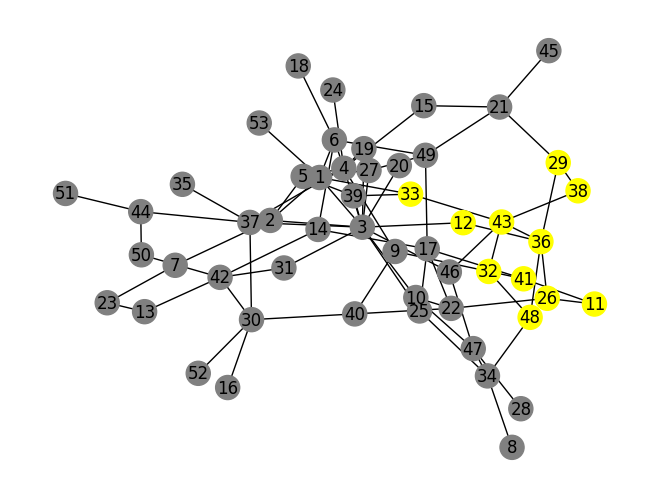

In [102]:
#STEP 4

node_colors = [partition[node] for node in graph.nodes()]
node_colors = ['yellow' if color == 0 else 'grey' for color in node_colors]
edge_widths = [1] * graph.number_of_edges()
node_sizes = [300] * graph.number_of_nodes()
node_size_map = {node: 1000 for node in graph.nodes()}
nx.draw(graph, with_labels=True, node_color=node_colors, node_size=node_sizes, width=edge_widths)
plt.show()